In [1]:
import mlflow
import dagshub
dagshub.init(repo_owner='rohanjoshi2005', repo_name='sentiment_analysis', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow")

Accessing as rohanjoshi2005

Initialized MLflow to track repo "rohanjoshi2005/sentiment_analysis"

Repository rohanjoshi2005/sentiment_analysis initialized!

In [2]:
# Set or create experiment
mlflow.set_experiment("Exp-2 BOW vs TFIDF")

<Experiment: artifact_location='mlflow-artifacts:/205b886daf124c51a154527acf79889e', creation_time=1751537526204, experiment_id='1', last_update_time=1751537526204, lifecycle_stage='active', name='Exp-2 BOW vs TFIDF', tags={}>

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [4]:
df=pd.read_csv("dataset.csv")

In [5]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal wrappi...,0
4,benefit may want read living buddha living chr...,1


In [6]:
df.isnull().sum()

clean_comment    177
category           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

2025/07/04 11:54:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run bow_(1, 1)_RandomForest at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1/runs/6809a60266dc44558123dffbee045c54
🧪 View experiment at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1


2025/07/04 11:55:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run tfidf_(1, 1)_RandomForest at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1/runs/fdd87b3590554f3fa8737ea6f6a0841f
🧪 View experiment at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1


2025/07/04 11:55:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run bow_(1, 2)_RandomForest at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1/runs/6e04e040edd5491286ff16d02eaf666f
🧪 View experiment at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1


2025/07/04 11:56:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run tfidf_(1, 2)_RandomForest at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1/runs/5571296c21f846689d0bb4f0fb7509c7
🧪 View experiment at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1


2025/07/04 11:57:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run bow_(1, 3)_RandomForest at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1/runs/0e766275bcbc453ba4d5e0dde217b9f4
🧪 View experiment at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1


2025/07/04 11:58:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run tfidf_(1, 3)_RandomForest at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1/runs/ea668641f2f3491982cbc7dc952f74c4
🧪 View experiment at: https://dagshub.com/rohanjoshi2005/sentiment_analysis.mlflow/#/experiments/1


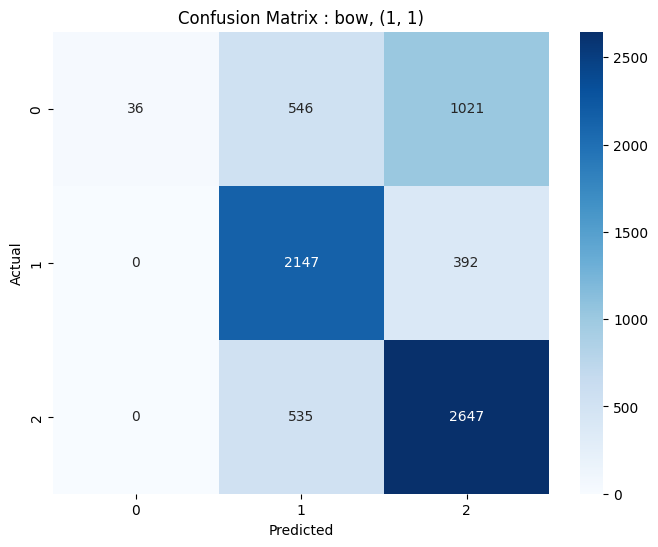

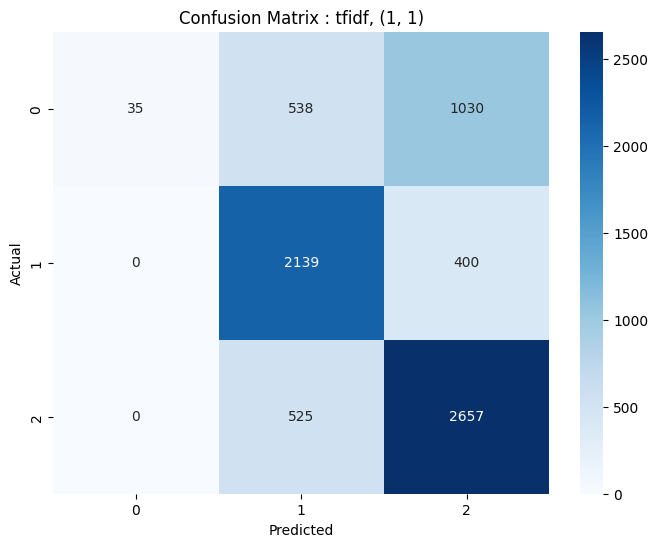

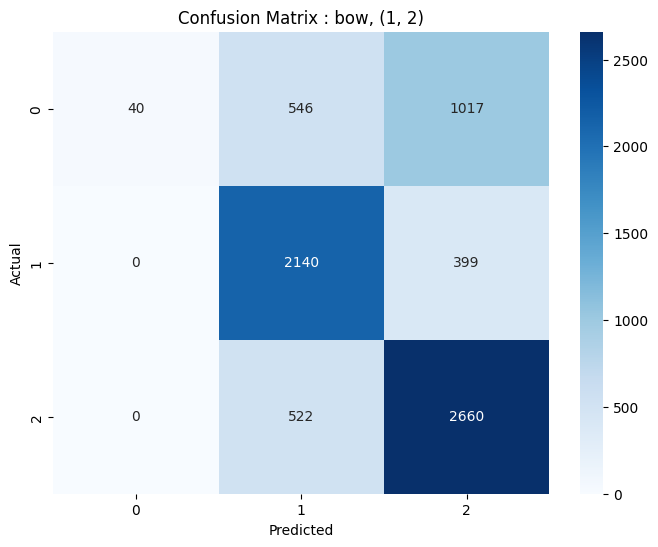

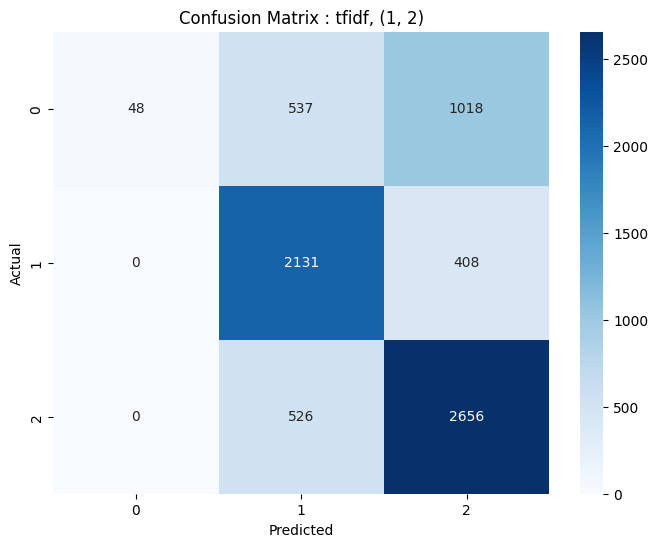

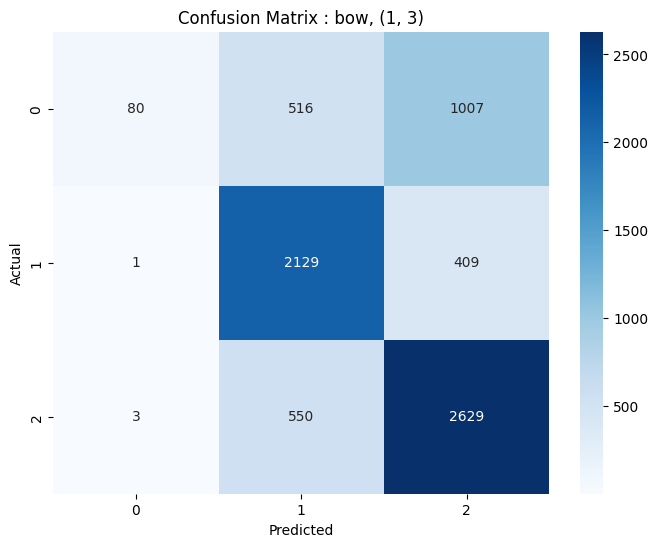

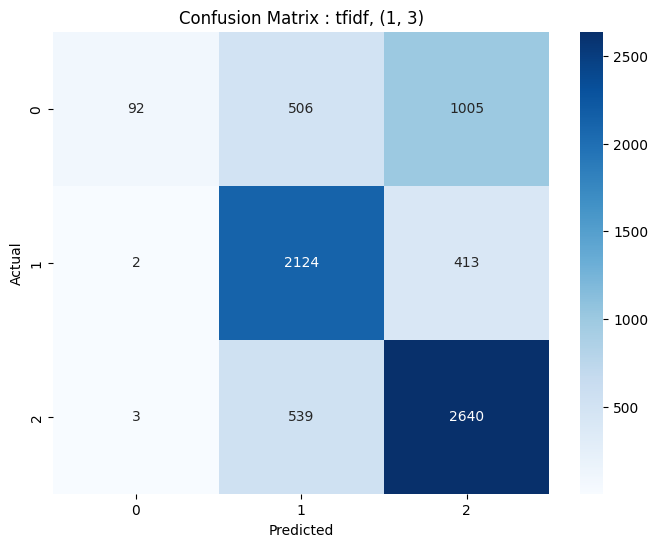

In [9]:
def run_experiment(vectorizer_type, ngram_range, vectorizer_max_features, vectorizer_name):

  if vectorizer_type=="bow":
    vectorizer=CountVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)
  else:
    vectorizer=TfidfVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)



  X_train, X_test, y_train, y_test = train_test_split(df["clean_comment"], df["category"], test_size=0.2, random_state=42)

  X_train=vectorizer.fit_transform(X_train)
  X_test=vectorizer.transform(X_test)


  with mlflow.start_run() as run:
    # Set tags for experiment and run
    mlflow.set_tag("mlflow.runName",f"{vectorizer_name}_{ngram_range}_RandomForest")
    mlflow.set_tag("experiment_type","feature_engineering")
    mlflow.set_tag("model_type","RandomForestClassifier")
    mlflow.set_tag("description",f"RandomForset with {vectorizer_name}, ngram_range={ngram_range}, max_features={vectorizer_max_features}")

    # Log parameters for vectorizer
    mlflow.log_param("vectorizer_type", vectorizer_type)
    mlflow.log_param("ngram_range", ngram_range)
    mlflow.log_param("vectorizer_max_features", vectorizer_max_features)

    # Log RandomForset parameters
    n_estimators=200
    max_depth=15
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Initialize and train the model
    model=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    y_pred=model.predict(X_test)

    # Log accuracy
    accuracy=accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    # Log classification report
    classification_rep=classification_report(y_test,y_pred,output_dict=True)
    for label,metrics in classification_rep.items():
      if isinstance(metrics,dict):
        for metric,value in metrics.items():
          mlflow.log_metric(f"{label}_{metric}",value)


    # Log confusion matrix
    conf_matrix=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix : {vectorizer_name}, {ngram_range}")
    plt.savefig(f"confusion_matrix_{vectorizer_name}_{ngram_range}.png")
    mlflow.log_artifact(f"confusion_matrix_{vectorizer_name}_{ngram_range}.png")

    # Log model
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path=f"RandomForestModel_{vectorizer_name}_{ngram_range}"
    )




ngram_ranges=[(1,1),(1,2),(1,3)]
vectorizer_max_features=5000


for ngram_range in ngram_ranges:
  run_experiment("bow", ngram_range, vectorizer_max_features, "bow")
  run_experiment("tfidf", ngram_range, vectorizer_max_features, "tfidf")